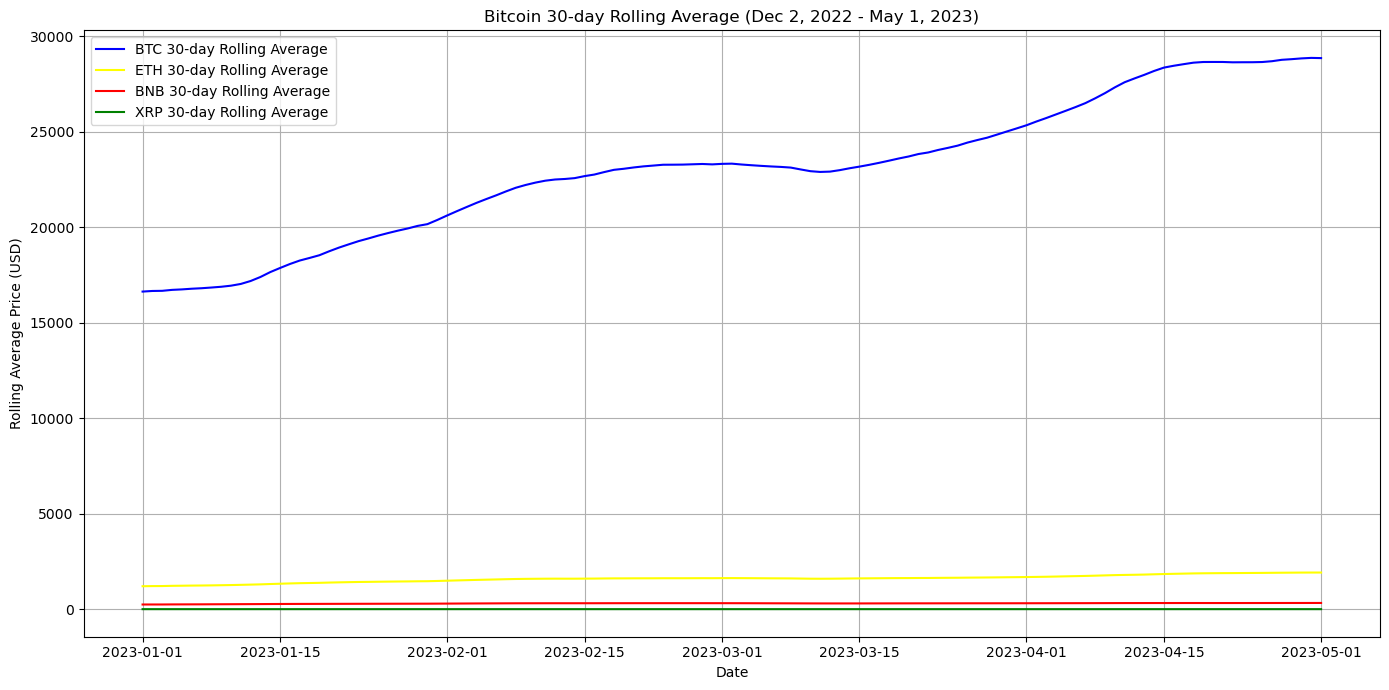

In [29]:
import rdflib
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the graph
g = rdflib.Graph()

# Load your RDF data
g.parse("/Users/qinghaoyang/Downloads/semantic_web-main 2/data/defi/defi.owl")  # Replace with your data source

# SPARQL query
query = """
PREFIX ns1: <http://www.semanticweb.org/sichengyun/ontologies/2023/6/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
?date ?BTCprice ?ETHprice ?BNBprice ?XRPprice

WHERE {
    ?btc ns1:BTC_date ?date ;
         ns1:BTC_price ?BTCprice .
         ?eth ns1:ETH_date ?date ;
         ns1:ETH_price ?ETHprice .
         ?bnb ns1:BNB_date ?date ;
         ns1:BNB_price ?BNBprice .
         ?xrp ns1:XRP_date ?date ;
         ns1:XRP_price ?XRPprice .
    FILTER (?date >= "2022-12-02"^^xsd:date && ?date <= "2023-05-01"^^xsd:date)
}
ORDER BY ?date
"""

# Execute the query
qres = g.query(query)

# Process the results into a DataFrame
data = [(row.date.toPython(), float(row.BTCprice), float(row.ETHprice), float(row.BNBprice), float(row.XRPprice)) for row in qres]
df = pd.DataFrame(data, columns=['Date', 'BTCPrice', 'ETHPrice', 'BNBPrice', 'XRPPrice'])
df['Date'] = pd.to_datetime(df['Date'])

# Compute daily returns and volatility
for col in ['BTCPrice', 'ETHPrice', 'BNBPrice', 'XRPPrice']:
    df[col + 'DailyReturn'] = df[col].pct_change()
    df[col + 'Rolling'] = df[col].rolling(window=30, min_periods=1).mean()
    df[col + 'Volatility'] = df[col + 'DailyReturn'].rolling(window=30, min_periods=1).std() * (252 ** 0.5)

# Plotting the volatility
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['BTCPriceRolling'], label='BTC 30-day Rolling Average', color='blue')
plt.plot(df['Date'], df['ETHPriceRolling'], label='ETH 30-day Rolling Average', color='yellow')
plt.plot(df['Date'], df['BNBPriceRolling'], label='BNB 30-day Rolling Average', color='red')
plt.plot(df['Date'], df['XRPPriceRolling'], label='XRP 30-day Rolling Average', color='green')
plt.title('Bitcoin 30-day Rolling Average (Dec 2, 2022 - May 1, 2023)')
plt.xlabel('Date')
plt.ylabel('Rolling Average Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#

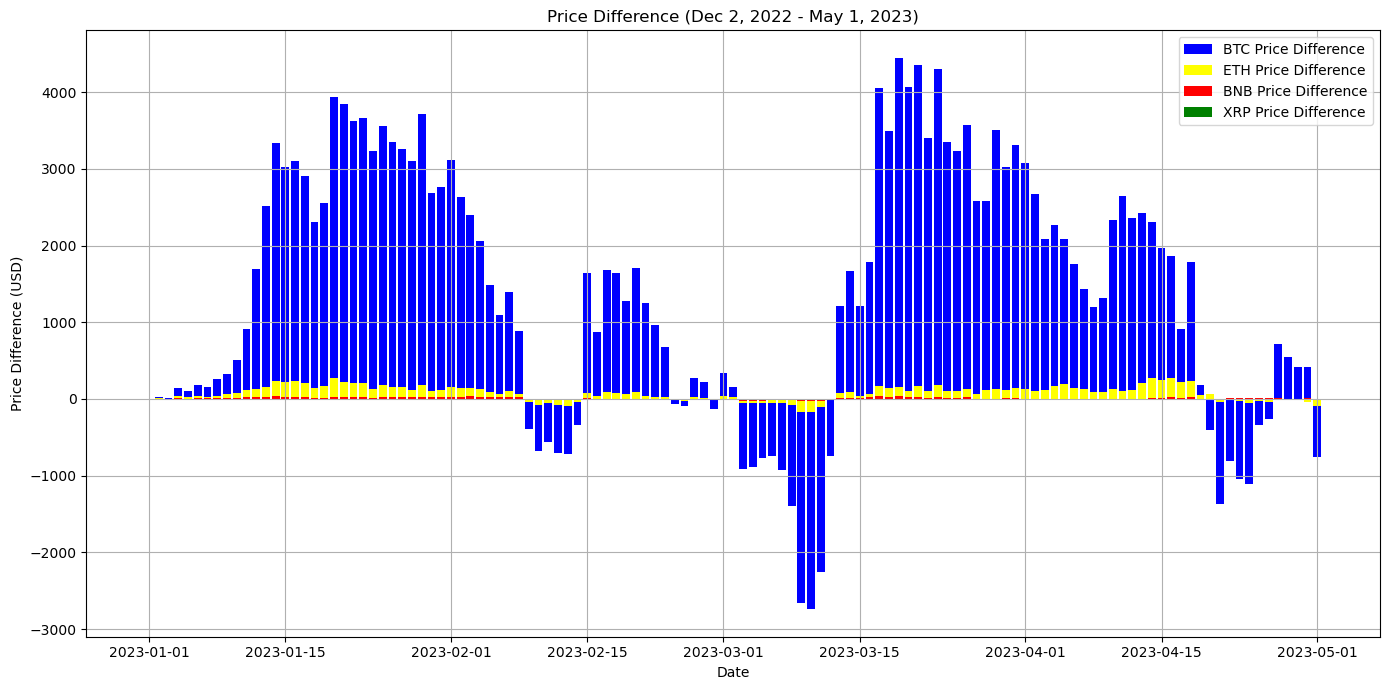

In [36]:
# PLotting the Price difference in bars, with red bars indicating a drop in price, and green bars indicating a rise in price
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['BTCPrice'] - df['BTCPriceRolling'], label='BTC Price Difference', color='blue')
plt.bar(df['Date'], df['ETHPrice'] - df['ETHPriceRolling'], label='ETH Price Difference', color='yellow')
plt.bar(df['Date'], df['BNBPrice'] - df['BNBPriceRolling'], label='BNB Price Difference', color='red')
plt.bar(df['Date'], df['XRPPrice'] - df['XRPPriceRolling'], label='XRP Price Difference', color='green')
plt.title('Price Difference (Dec 2, 2022 - May 1, 2023)')
plt.xlabel('Date')
plt.ylabel('Price Difference (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [37]:
# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting BTC Price Difference on the primary y-axis
ax1.bar(df['Date'], df['BTCPrice'] - df['BTCPriceRolling'], label='BTC Price Difference', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price Change (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for ETH, BNB, and XRP Price Differences
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['ETHPrice'] - df['ETHPriceRolling'], label='ETH Price Difference', color='yellow', alpha=0.6)
ax2.bar(df['Date'], df['BNBPrice'] - df['BNBPriceRolling'], label='BNB Price Difference', color='red', alpha=0.6)
ax2.bar(df['Date'], df['XRPPrice'] - df['XRPPriceRolling'], label='XRP Price Difference', color='green', alpha=0.6)
ax2.set_ylabel('ETH/BNB/XRP Price Change (USD)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and grid
plt.title('Price Change (Dec 2, 2022 - May 1, 2023)')
ax1.grid(True)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tight layout and show plot
plt.tight_layout()
plt.show()

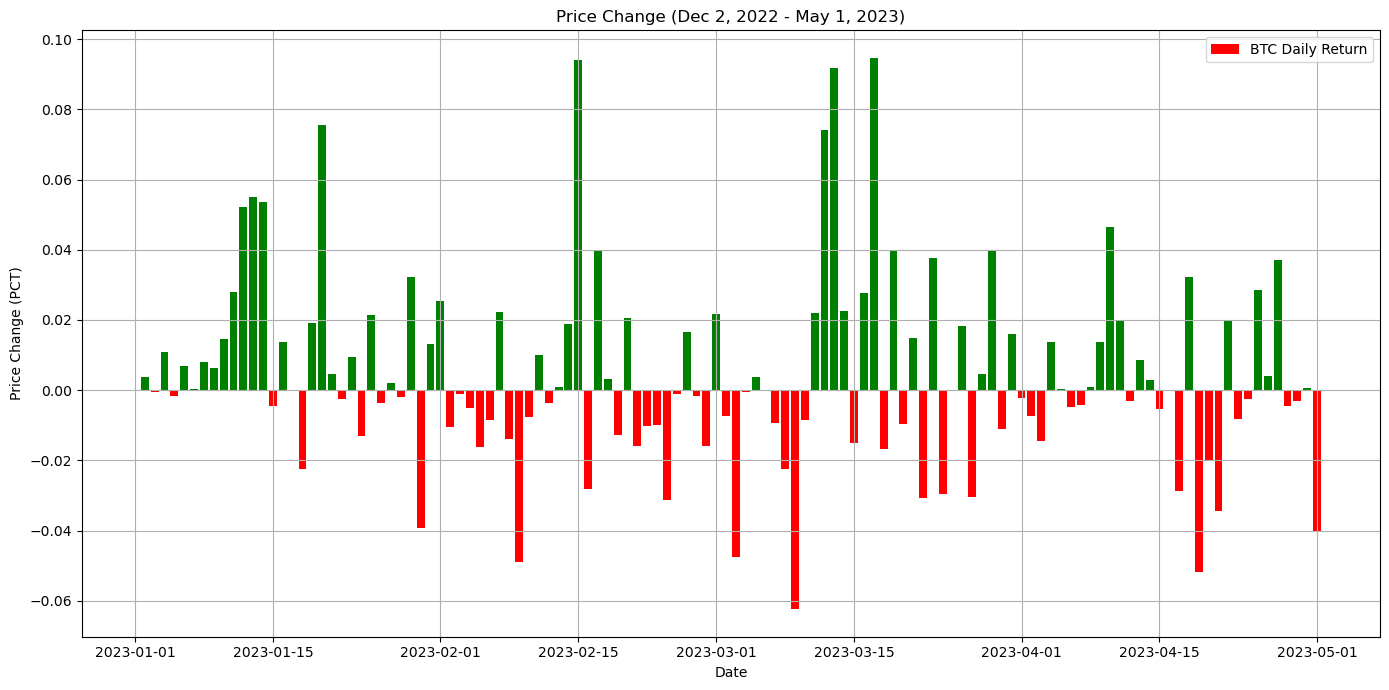

In [41]:
# PLotting the Daily Return of BTC in bars
#with red bars indicating a Daily return smaller than 0, and green bars indicating a Daily return larger than 0
colors = ['green' if value > 0 else 'red' for value in df['BTCPriceDailyReturn']]
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['BTCPriceDailyReturn'], label='BTC Daily Return', color=colors)
plt.title('Price Change (Dec 2, 2022 - May 1, 2023)')
plt.xlabel('Date')
plt.ylabel('Price Change (PCT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

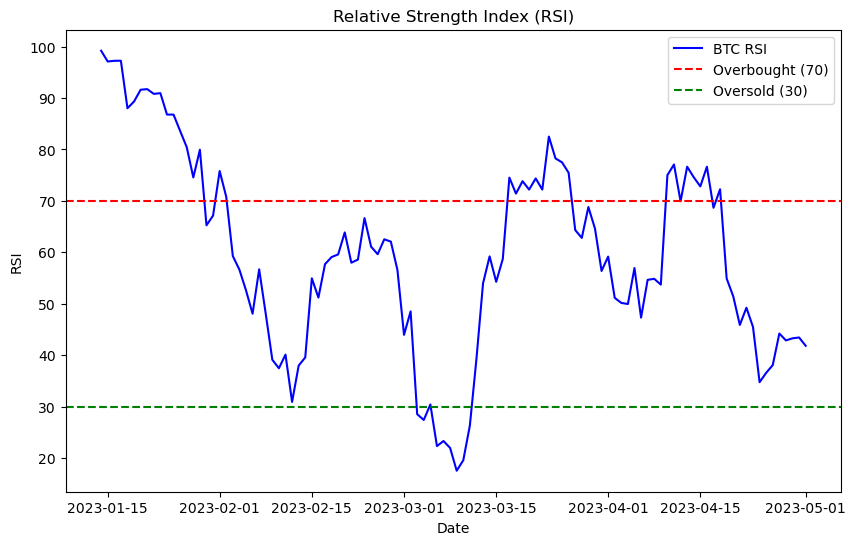

In [47]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btcrsi = calculate_rsi(df['BTCPrice'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], btcrsi, label='BTC RSI', color = 'blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.show()

In [43]:
# Calculate daily returns

# Calculate cumulative returns
df['BTCCumulativeReturn'] = (1 + df['BTCPriceDailyReturn']).cumprod()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['BTCCumulativeReturn'], label='Cumulative Return')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()